### Multi-label classificatio

In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
from fastai.conv_learner import *
from fastai.imports import *
from fastai.transforms import *
from fastai.dataset import *
from sklearn.metrics import fbeta_score

In [4]:
# no need this
# torch.cuda.set_device(0)
print(torch.cuda.device(0))
print(torch.cuda.get_device_name(0))

Tesla K80


In [5]:
PATH = 'data/'
arch=resnext50
bs=28

In [6]:
def get_data(size):
    tfms = tfms_from_model(arch, size, aug_tfms=transforms_side_on, max_zoom=1.1)
    return ImageClassifierData.from_paths(PATH, tfms=tfms, bs=bs, num_workers=4)

In [7]:
size = 64
data = get_data(size)
data = data.resize(int(size*1.3), 'tmp') 
# for speed up training in different size by pre generate new size image

datasets: [<fastai.dataset.FilesIndexArrayDataset object at 0x7fd3a71e3128>, <fastai.dataset.FilesIndexArrayDataset object at 0x7fd3a71e3278>, <fastai.dataset.FilesIndexArrayDataset object at 0x7fd3a71e3240>, <fastai.dataset.FilesIndexArrayDataset object at 0x7fd3a71e32e8>, None, None]


### 1. Find learning rate

 81%|████████  | 323/401 [00:15<00:03, 20.63it/s, loss=7.34]

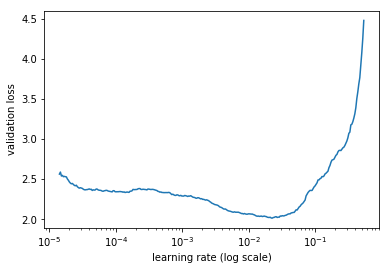

In [8]:
learn = ConvLearner.pretrained(arch, data)
learn.lr_find()
learn.sched.plot()

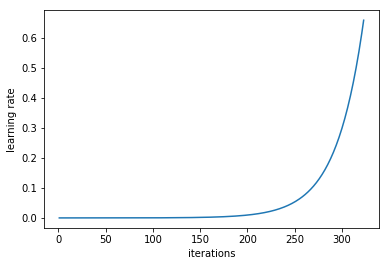

In [9]:
learn.sched.plot_lr()

### 2. Train Last Fully Connected Layer

In [10]:
lr = 0.03
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                   
    0      1.737236   1.534693   0.412679  
    1      1.612046   1.499702   0.425971                   
    2      1.566464   1.467794   0.440082                   
    3      1.580781   1.499021   0.427812                   
    4      1.530756   1.449272   0.440491                   
    5      1.491813   1.437651   0.452147                   
    6      1.466317   1.432516   0.452147                   


[array([1.43252]), 0.45214724007742535]

### 3. Unfreeze to train all layers

In [11]:
learn.unfreeze()
lrs = np.array([lr/9,lr/3,lr])
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy                   
    0      1.449009   1.33199    0.492229  
    1      1.309058   1.232155   0.536196                   
    2      1.095586   1.036637   0.608998                   
    3      1.276902   1.134522   0.57137                    
    4      1.06972    1.074965   0.59407                    
    5      0.893925   0.90271    0.667894                    
    6      0.799381   0.86758    0.674642                    


[array([0.86758]), 0.6746421290077802]

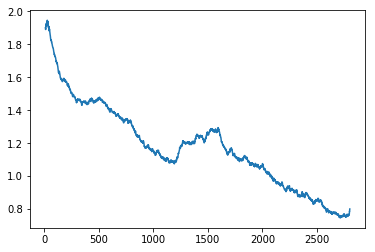

In [12]:
learn.save(f'{size}')
learn.sched.plot_loss()

In [13]:
multi_preds, y = learn.TTA()
preds = np.mean(multi_preds, 0)
accuracy_np(preds,y)

0.694683026584867

### 4. Change size to size=128 and do it again

In [14]:
size=128
learn.set_data(get_data(size))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

datasets: [<fastai.dataset.FilesIndexArrayDataset object at 0x7fd39d8d6630>, <fastai.dataset.FilesIndexArrayDataset object at 0x7fd3a55d4748>, <fastai.dataset.FilesIndexArrayDataset object at 0x7fd3a55d4828>, <fastai.dataset.FilesIndexArrayDataset object at 0x7fd3a55d4518>, None, None]


epoch      trn_loss   val_loss   accuracy                   
    0      1.313924   1.270706   0.514315  
    1      1.308728   1.22943    0.53047                    
    2      1.281856   1.198086   0.54499                    
    3      1.288984   1.214843   0.534765                   
    4      1.282455   1.183581   0.559509                   
    5      1.237996   1.162247   0.556033                   
    6      1.227102   1.168151   0.559918                   


[array([1.16815]), 0.5599181993851144]

In [15]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{size}')

epoch      trn_loss   val_loss   accuracy                    
    0      0.81136    0.708471   0.742331  
    1      0.737268   0.668667   0.755624                    
    2      0.511038   0.50617    0.817587                    
    3      0.670441   0.666676   0.760327                    
    4      0.519012   0.520643   0.816769                    
    5      0.314246   0.403175   0.859305                    
    6      0.24398    0.386163   0.863804                    


### 5. Change size to size=256 and do it again

In [16]:
size=256
learn.set_data(get_data(size))
learn.freeze()
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

datasets: [<fastai.dataset.FilesIndexArrayDataset object at 0x7fd3922e2860>, <fastai.dataset.FilesIndexArrayDataset object at 0x7fd3922e2b38>, <fastai.dataset.FilesIndexArrayDataset object at 0x7fd3922e2fd0>, <fastai.dataset.FilesIndexArrayDataset object at 0x7fd3922e2048>, None, None]


epoch      trn_loss   val_loss   accuracy                    
    0      0.834367   0.772174   0.716155  
    1      0.797181   0.742164   0.725767                    
    2      0.771666   0.727207   0.729243                    
    3      0.802541   0.721893   0.734765                    
    4      0.775885   0.689071   0.744581                    
    5      0.765953   0.673079   0.750511                    
    6      0.712555   0.667213   0.749898                    


[array([0.66721]), 0.749897750998811]

In [17]:
learn.unfreeze()
learn.fit(lrs, 3, cycle_len=1, cycle_mult=2)
learn.save(f'{size}')

epoch      trn_loss   val_loss   accuracy                    
    0      0.438623   0.337773   0.880368  
    1      0.435906   0.346754   0.875869                    
    2      0.238214   0.223086   0.924131                    
    3      0.38956    0.31798    0.884458                    
    4      0.267015   0.279959   0.90184                     
    5      0.148069   0.193816   0.932924                    
    6      0.120448   0.177729   0.939468                     


### Last Accuracy

In [18]:
multi_preds, y = learn.TTA()
preds = np.mean(multi_preds, 0)
accuracy_np(preds,y)

0.9482617586912065

### Load Model

In [20]:
PATH = 'data/'
arch=resnext50
size = 256
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, size))
learn = ConvLearner.pretrained(arch, data)
learn.load('../../data/tmp/83/models/256')

multi_preds, y = learn.TTA()
preds = np.mean(multi_preds, 0)
accuracy_np(preds,y)

datasets: [<fastai.dataset.FilesIndexArrayDataset object at 0x7fd39d881c18>, <fastai.dataset.FilesIndexArrayDataset object at 0x7fd39d881ba8>, <fastai.dataset.FilesIndexArrayDataset object at 0x7fd39d881f60>, <fastai.dataset.FilesIndexArrayDataset object at 0x7fd39d881198>, None, None]


0.9458077709611452

In [38]:
def predict(image_path):
    trn_tfms, val_tfms = tfms_from_model(arch, size)
    img = open_image(image_path)
    im = val_tfms(img)
    return learn.predict_array(im[None])
# np.argmax(predict('data/valid/convertible/Aston Martin V8 Vantage Convertible 201200239.jpg'))
# np.argmax(predict('data/valid/coupe/Acura Integra Type R 200102742.jpg'))
np.argmax(predict('data/valid/hatchback/Acura ZDX Hatchback 201200036.jpg'))


2

In [39]:
data.val_ds